<a href="https://colab.research.google.com/github/san2connect/StatisticalLearning-Project2/blob/master/PGPAIML'Dec19_Lab_on_NNDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [180]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import seaborn as sns
import h5py
from sklearn.metrics import classification_report

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [181]:
# run this cell to upload file using GUI if you are using google colab

from google.colab import files
#files.upload()

In [182]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/lab-nndl/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
import os
os.chdir(data_path)

In [184]:
import pandas as pd 

df= pd.read_csv(data_path+'prices.csv')

In [185]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [186]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [187]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

## Question 2

### Drop null
- Drop null values if any

In [188]:
# No Null values
#df.dropna()

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [189]:
df.drop(columns = ['date','volume','symbol'], axis=1, inplace=True )

## Question 3

### Print the dataframe
- print the modified dataframe

In [190]:
df.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


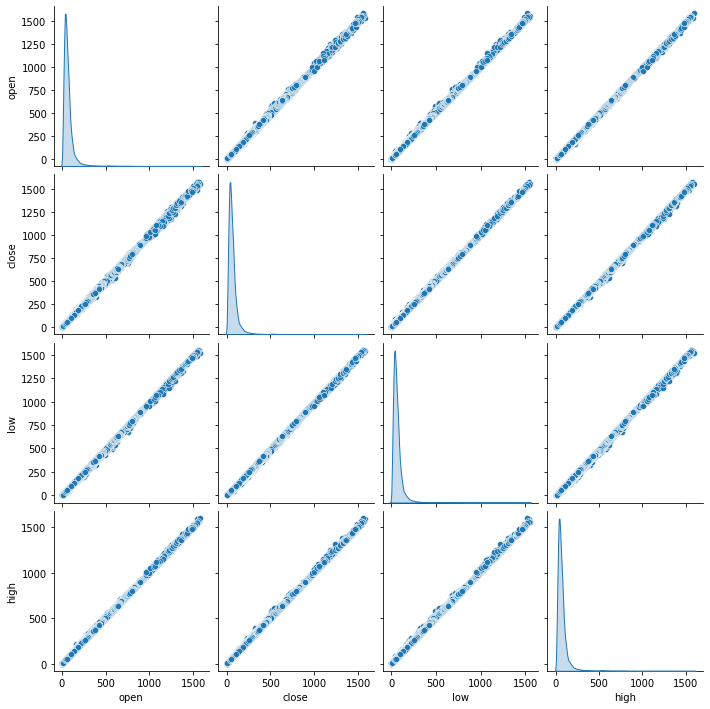

In [191]:
import seaborn as sns

sns.pairplot(df[['open', 'close', 'low', 'high']], diag_kind='kde')

### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [192]:
X = df.drop('close', axis =1)
Y = df['close']

## Question 4

### Create train and test sets
- Split the data into training and testing

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [194]:
x = df.drop('close', axis= 1)
y = df['close']


In [195]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7)

In [196]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(638448, 3)
(212816, 3)
(638448,)
(212816,)


## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [197]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [198]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(638448, 3)
(212816, 3)
(638448,)
(212816,)


In [199]:
type(y_train)

pandas.core.series.Series

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [200]:
x_train_numpy = np.array(x_train)
x_test_numpy = np.array(x_test)

In [201]:
type(x_test_numpy)

numpy.ndarray

In [202]:
type(y_train)

pandas.core.series.Series

In [203]:
tf.keras.backend.clear_session()

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [204]:
model = keras.Sequential()
model.add(keras.layers.Flatten( ))
model.add(keras.layers.Dense(units = 1 , activation = 'linear'))


In [205]:
x_train_numpy.shape[1]

3

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [206]:
model.compile(optimizer='sgd', loss = 'mean_squared_error', metrics=['mse', 'mae', 'accuracy'])

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [207]:
history= model.fit(x_train, y_train, epochs= 50, validation_data=(x_test, y_test), batch_size= 128)

Epoch 1/50
4988/4988 [==============================] - 6s 1ms/step - loss: 38.9386 - mse: 38.9386 - mae: 1.1704 - accuracy: 4.6989e-06 - val_loss: 0.9877 - val_mse: 0.9877 - val_mae: 0.4912 - val_accuracy: 0.0000e+00
Epoch 2/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9931 - mse: 0.9931 - mae: 0.4843 - accuracy: 4.6989e-06 - val_loss: 0.9531 - val_mse: 0.9531 - val_mae: 0.4806 - val_accuracy: 0.0000e+00
Epoch 3/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9869 - mse: 0.9869 - mae: 0.4826 - accuracy: 4.6989e-06 - val_loss: 0.9406 - val_mse: 0.9406 - val_mae: 0.4783 - val_accuracy: 0.0000e+00
Epoch 4/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9781 - mse: 0.9781 - mae: 0.4810 - accuracy: 4.6989e-06 - val_loss: 0.9467 - val_mse: 0.9467 - val_mae: 0.4807 - val_accuracy: 0.0000e+00
Epoch 5/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9702 - mse: 0.9702 - mae: 0.4797 - accuracy: 4.6989e-06 

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [208]:
model.evaluate(x_test, y_test)

6651/6651 [==============================] - 5s 794us/step - loss: 0.6909 - mse: 0.6909 - mae: 0.4157 - accuracy: 0.0000e+00


[0.690850555896759, 0.690850555896759, 0.41569194197654724, 0.0]

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [209]:
input_data = np.expand_dims([123.430000, 122.30999, 116.250000], axis=0)
pred = model.predict(input_data)
pred

array([[10081.061]], dtype=float32)

In [210]:
print(tf.__version__)

2.3.0


# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [211]:
fashion = tf.keras.datasets.fashion_mnist

In [212]:
(x_train, y_train), (x_test, y_test) = fashion.load_data()

In [213]:
print("X_train Shape: ", x_train.shape)
print("Y_train Shape: ", y_train.shape)
print("X_test Shape: ", x_test.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (60000, 28, 28)
Y_train Shape:  (60000,)
X_test Shape:  (10000, 28, 28)
y_test Shape:  (10000,)


In [214]:
np.unique(y_train, axis= 0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

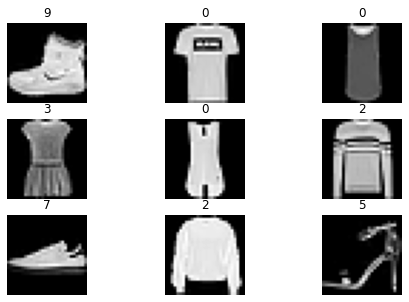

In [215]:
plt.figure(figsize= (8,5))
for i in range(9):
    plt.subplot(330+ i +1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])
plt.show()


### Change train and test labels into one-hot vectors

In [216]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

### Build the Graph

### Initialize model, reshape & normalize data

In [217]:
x_train = (x_train/255.0).astype('float32')
x_test = (x_test/255.0).astype('float32')

In [218]:
x_train= x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test= x_test.reshape(x_test.shape[0], 28, 28, 1)

In [219]:
x_train.shape

(60000, 28, 28, 1)

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [220]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape= [28,28]),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(200, activation= 'relu', kernel_initializer= 'he_normal'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.25),

        
        keras.layers.Dense(100, activation= 'relu', kernel_initializer= 'he_normal'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.25),

        keras.layers.Dense(10, activation= 'softmax')
])

In [221]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

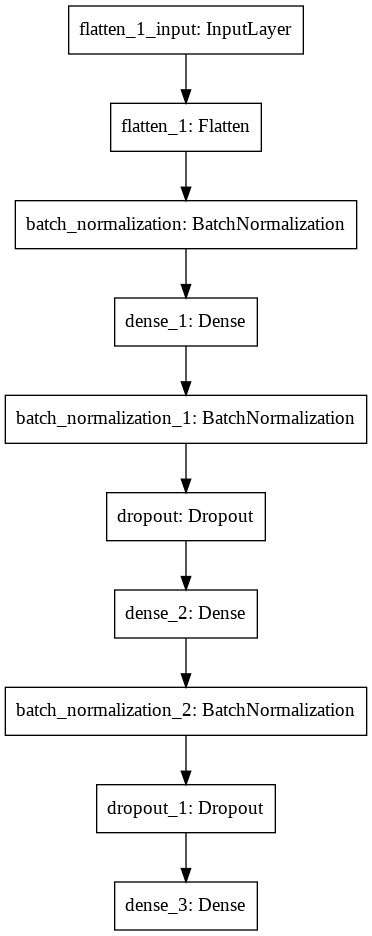

In [222]:
tf.keras.utils.plot_model(model)

In [223]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [224]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience= 5)
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights= True)

In [225]:
history= model.fit(x_train, y_train, epochs= 200, validation_data=(x_test, y_test),
                   callbacks= [early_stop, lr_scheduler], batch_size= 128)

Epoch 1/200
469/469 [==============================] - 4s 9ms/step - loss: 0.5606 - accuracy: 0.8042 - val_loss: 0.4061 - val_accuracy: 0.8530
Epoch 2/200
469/469 [==============================] - 4s 9ms/step - loss: 0.4055 - accuracy: 0.8536 - val_loss: 0.3711 - val_accuracy: 0.8651
Epoch 3/200
469/469 [==============================] - 4s 9ms/step - loss: 0.3649 - accuracy: 0.8675 - val_loss: 0.3572 - val_accuracy: 0.8704
Epoch 4/200
469/469 [==============================] - 4s 9ms/step - loss: 0.3399 - accuracy: 0.8749 - val_loss: 0.3400 - val_accuracy: 0.8788
Epoch 5/200
469/469 [==============================] - 4s 9ms/step - loss: 0.3217 - accuracy: 0.8812 - val_loss: 0.3357 - val_accuracy: 0.8786
Epoch 6/200
469/469 [==============================] - 4s 9ms/step - loss: 0.3076 - accuracy: 0.8863 - val_loss: 0.3225 - val_accuracy: 0.8823
Epoch 7/200
469/469 [==============================] - 4s 9ms/step - loss: 0.2964 - accuracy: 0.8909 - val_loss: 0.3186 - val_accuracy: 0.8817

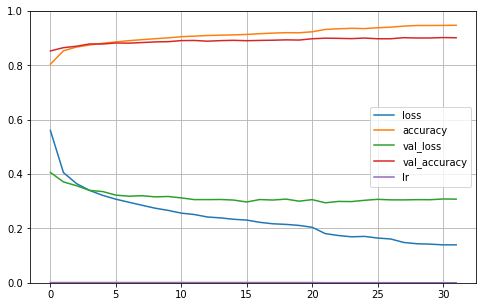

In [226]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [227]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2943 - accuracy: 0.9000


[0.2943250834941864, 0.8999999761581421]

Model is having accuracy which is good and doesnot show any signs of over or underfitting. 

In [228]:
x_new= x_test[:10]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [229]:
preds = model.predict(x_test)

In [230]:
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.82      0.83      0.82      1000
           3       0.90      0.91      0.90      1000
           4       0.82      0.86      0.84      1000
           5       0.98      0.97      0.97      1000
           6       0.75      0.70      0.73      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

